In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import caffe

In [6]:
caffe.set_mode_cpu()

In [7]:
net = caffe.Net('conv.prototxt', caffe.TEST)


In [8]:
print net.inputs
print  [(k, v.data.shape) for k, v in net.blobs.items()]

[]
[('data', (64, 1, 36, 36)), ('labels', (64,)), ('conv1', (64, 5, 32, 32)), ('pool1', (64, 5, 16, 16)), ('conv2', (64, 10, 12, 12)), ('pool2', (64, 10, 6, 6)), ('ip1', (64, 50)), ('ip2', (64, 2)), ('prob', (64, 2))]


In [9]:
net.forward()

{'labels': array([ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
         1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32),
 'prob': array([[ 0.4399536 ,  0.56004637],
        [ 0.436663  ,  0.56333697],
        [ 0.43535098,  0.56464905],
        [ 0.44515595,  0.55484402],
        [ 0.43486452,  0.56513548],
        [ 0.43789011,  0.56210989],
        [ 0.4328354 ,  0.5671646 ],
        [ 0.44138122,  0.55861878],
        [ 0.44132257,  0.55867743],
        [ 0.4381617 ,  0.56183827],
        [ 0.44226044,  0.55773956],
        [ 0.43767995,  0.56232005],
        [ 0.43378463,  0.56621534],
        [ 0.4415682 ,  0.55843186],
        [ 0.44145572,  0.55854428],
        [ 0.43974808,  0.56025189],
        [ 0.43870696,  0.5612

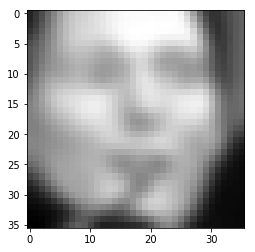

FACE


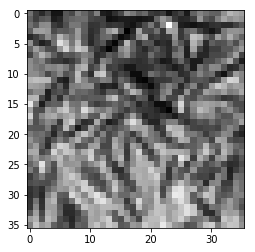

NO FACE


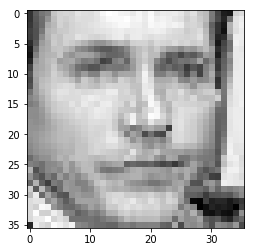

FACE


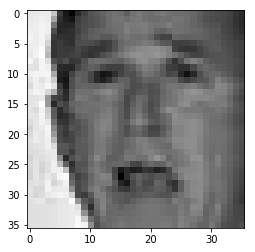

FACE


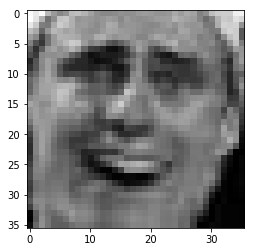

FACE


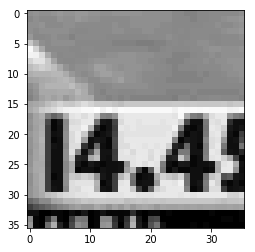

NO FACE


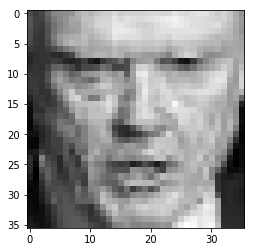

FACE


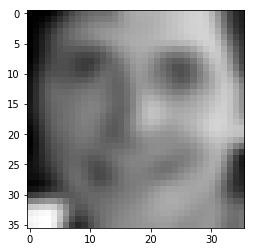

FACE


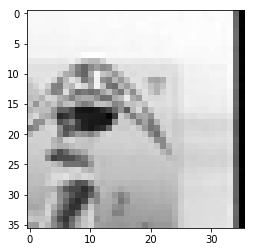

NO FACE


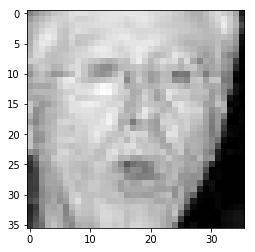

FACE


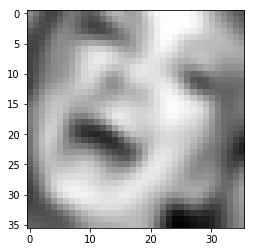

FACE


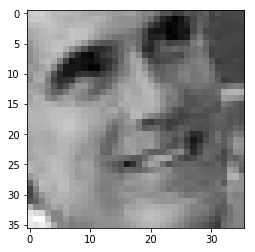

FACE


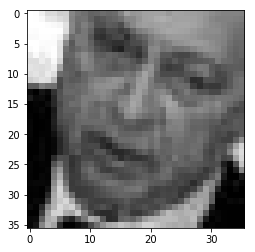

FACE


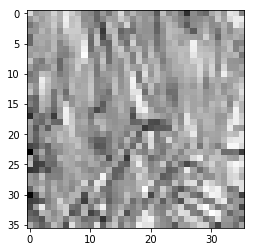

NO FACE


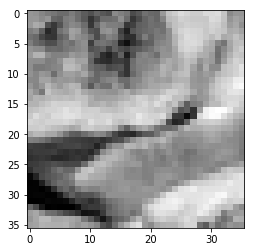

NO FACE


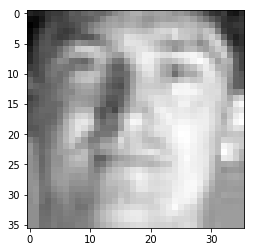

FACE


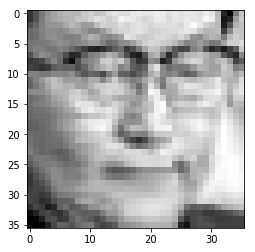

FACE


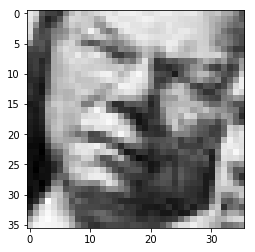

FACE


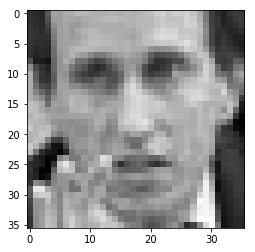

FACE


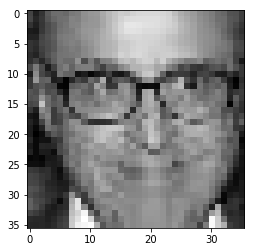

FACE


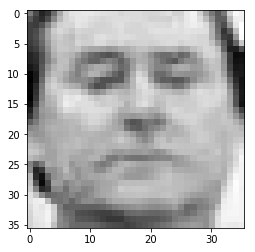

FACE


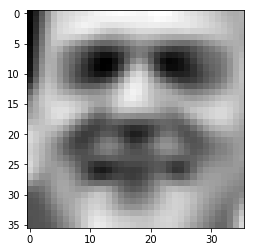

FACE


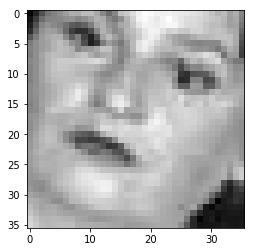

FACE


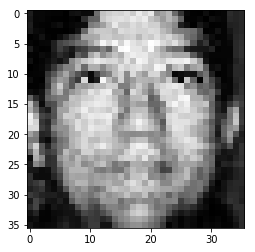

FACE


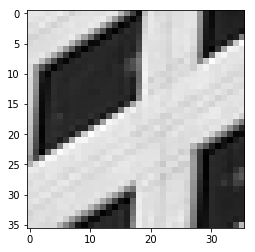

NO FACE


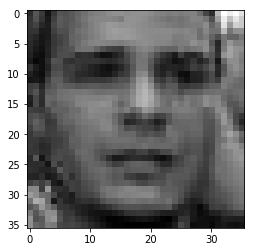

FACE


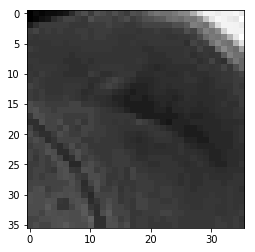

NO FACE


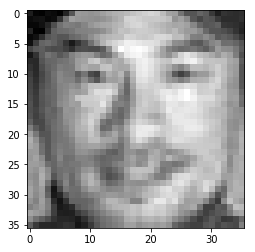

FACE


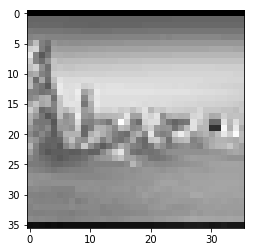

NO FACE


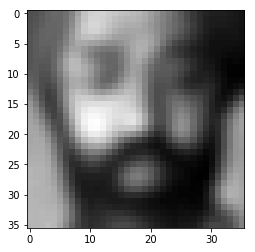

FACE


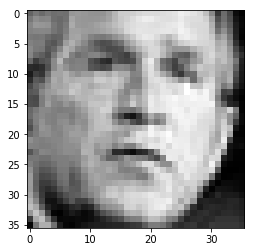

FACE


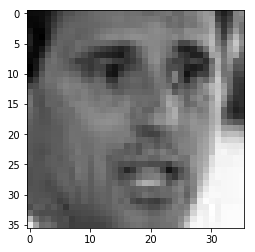

FACE


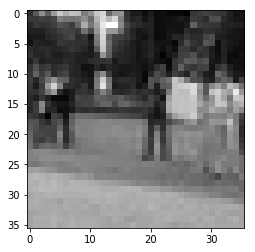

NO FACE


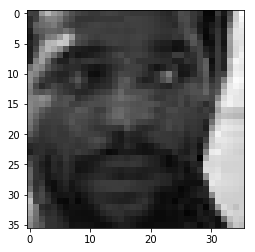

FACE


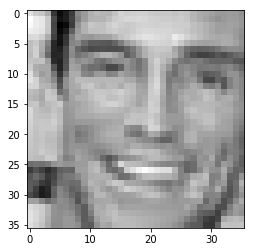

FACE


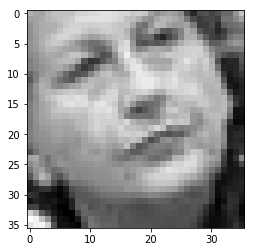

FACE


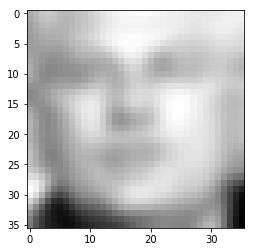

FACE


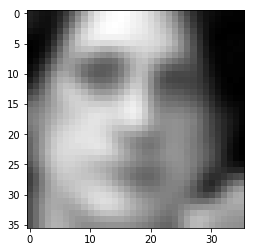

FACE


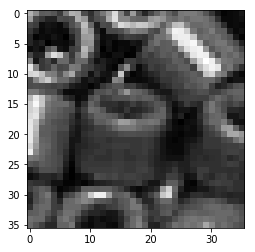

NO FACE


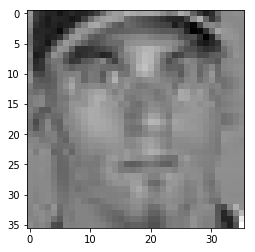

FACE


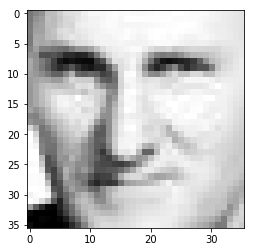

FACE


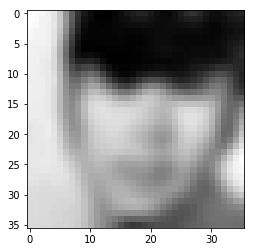

FACE


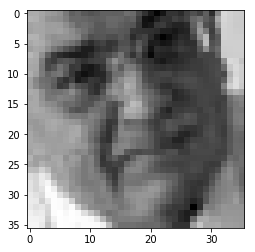

FACE


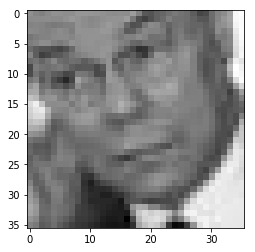

FACE


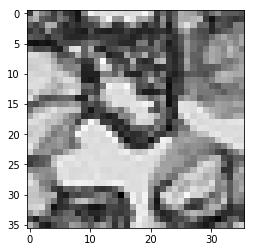

NO FACE


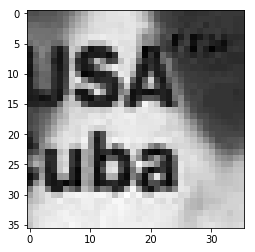

NO FACE


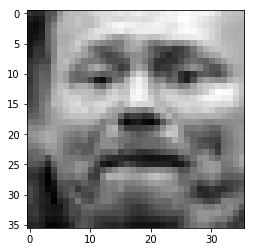

FACE


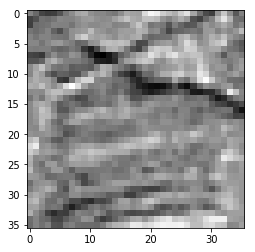

NO FACE


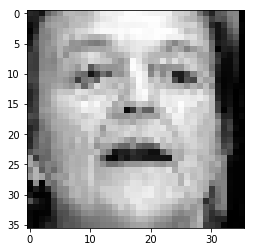

FACE


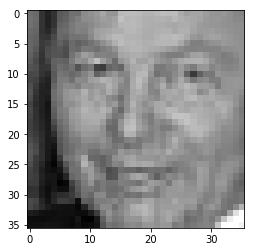

FACE


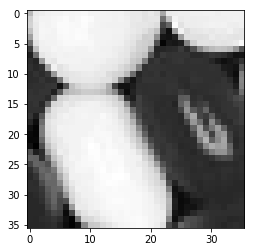

NO FACE


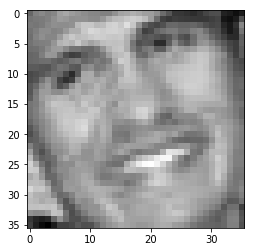

FACE


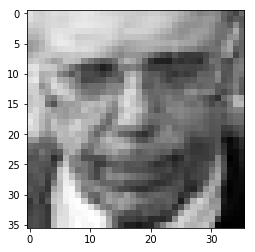

FACE


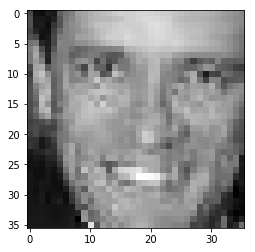

FACE


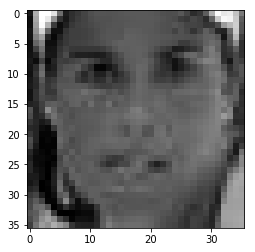

FACE


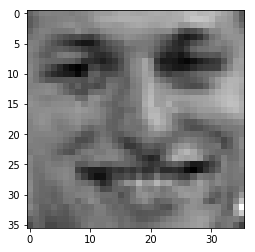

FACE


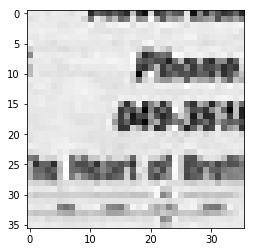

NO FACE


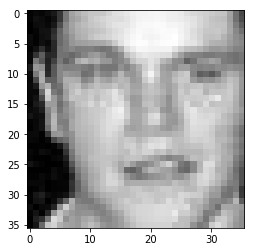

FACE


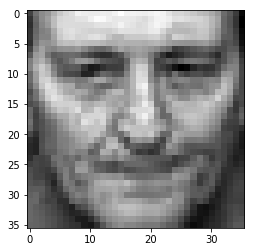

FACE


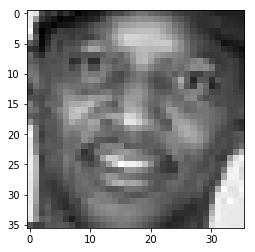

FACE


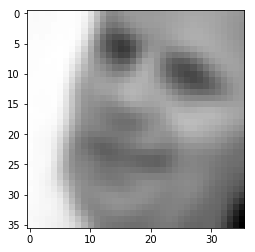

FACE


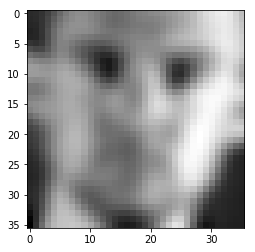

FACE


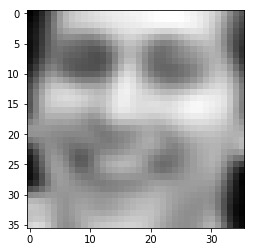

FACE


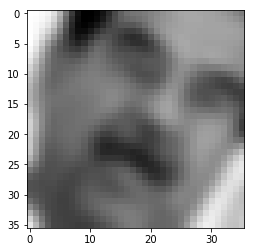

FACE


In [10]:
for i in range(64):
    plt.imshow(net.blobs['data'].data[i,0], cmap='gray')
    plt.show()
    print(["NO FACE","FACE"][int(net.blobs['labels'].data[i])])

In [12]:
solver = caffe.SGDSolver('solver.prototxt')


In [ ]:
solver.solve()


In [26]:
accuracy = 0
batch_size = solver.test_nets[0].blobs['data'].num
test_iters = 10
for i in range(test_iters):
    solver.test_nets[0].forward()
    accuracy += solver.test_nets[0].blobs['prob'].data
accuracy /= test_iters

print "Accuracy: {}".format(accuracy)


Accuracy: [[ 0.75179565  0.24820431]
 [ 0.75261569  0.24738434]
 [ 0.75163805  0.24836195]
 [ 0.75268     0.24731989]
 [ 0.75123173  0.24876826]
 [ 0.75193161  0.24806836]
 [ 0.75099456  0.24900541]
 [ 0.75202578  0.24797419]
 [ 0.75130969  0.24869028]
 [ 0.75093329  0.24906678]
 [ 0.75050777  0.24949221]
 [ 0.75126404  0.24873595]
 [ 0.75116628  0.24883363]
 [ 0.75141394  0.24858601]
 [ 0.75168592  0.24831414]
 [ 0.75180411  0.24819593]
 [ 0.75279975  0.24720022]
 [ 0.75184053  0.24815945]
 [ 0.75118798  0.24881208]
 [ 0.75172102  0.24827905]
 [ 0.75061256  0.24938746]
 [ 0.75227147  0.24772859]
 [ 0.75145644  0.24854358]
 [ 0.75140846  0.2485915 ]
 [ 0.75112116  0.24887879]
 [ 0.75211716  0.24788292]
 [ 0.7520352   0.24796478]
 [ 0.75263792  0.24736209]
 [ 0.75181615  0.24818388]
 [ 0.75151324  0.24848671]
 [ 0.75224745  0.2477525 ]
 [ 0.75061542  0.24938461]
 [ 0.751405    0.24859497]
 [ 0.7517761   0.24822393]
 [ 0.75110614  0.24889395]
 [ 0.75161731  0.24838269]
 [ 0.75179356  0.2

In [27]:
solver.snapshot()